<h1>Análisis exploratorio </h1>
<p>Proyecto aplicado - Rescindidos Funeraria La Aurora</´p>
<p>Carlos Felipe Cortés Cataño - Carlos Luis Mora Cañas </p>

In [1]:
import pandas as pd
from datetime import datetime
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go
import re


In [2]:
data= pd.read_csv("../data/outputs/principal_v0.2.csv")
data.head(2)


,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,inactivoi_activoi,recauExitoso,recauFallido,Direccion,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,685 days,2,1,Carrera 8 - Calle 17 # 28,La Dorada,2.0,0,0,-74.668116,5.454237
1,59,2018-09-10,Luis Roberto Murillo,68.0,1954-12-18,5.0,0.0,Familiar,Inactivo - Dificultad para ubicarlo,2021-04-07 05:00:00.000,...,740 days,6,31,CRA 3 47 - 21 FERIAS VIEJO,La Dorada,1.0,0,0,-74.674757,5.479989


In [7]:
data["estado"] = data["EstadoActual"].str.split(pat="-", expand=True, n=1)[0]

In [8]:
data["motivo"] = data["EstadoActual"].str.split(pat="-", expand=True, n=1)[1]


In [9]:
data.head(1)

,CodigoPrograma,fechaSolicitud,tomador,edad,fechaNacimiento,#_inscritos_activos,#_mascotas_activas,TipoPrograma,EstadoActual,FechaRescindido,...,recauFallido,Direccion,LocalidadVenta,Nivel Socio Economico,Barrio,Localidad,Longitud,Latitud,estado,motivo
0,56,2018-09-07,Leon Dario Cardona Velez,64.0,1958-09-28,0.0,0.0,Familiar,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,...,1,Carrera 8 - Calle 17 # 28,La Dorada,2.0,0,0,-74.668116,5.454237,Inactivo,Influencia de seres cercanos


In [11]:
data.columns

Index(['CodigoPrograma', 'fechaSolicitud', 'tomador', 'edad',
       'fechaNacimiento', '#_inscritos_activos', '#_mascotas_activas',
       'TipoPrograma', 'EstadoActual', 'FechaRescindido', 'valorCuota_1',
       'valorUltimaCuota', 'fechaIdealPago_CuotaCancelada', 'qinactivos',
       'qactivos', 'fechaactivoi', 'motivoactivoi', 'fechainactivof',
       'motivoinactivof', 'fechainactivoi', 'motivoinactivoi', 'fechaactivof',
       'motivoactivof', 'inactivof_activoi', 'inactivof_activof',
       'inactivoi_activoi', 'recauExitoso', 'recauFallido', 'Direccion',
       'LocalidadVenta', 'Nivel Socio Economico', 'Barrio', 'Localidad',
       'Longitud', 'Latitud', 'estado', 'motivo'],
      dtype='object')

In [17]:
data = data.drop(["TipoPrograma", "EstadoActual"], axis=1)

# Análisis univariado

In [29]:
data["CodigoPrograma"].count()

9040

Contamos con 9040 programas

<AxesSubplot:ylabel='Frequency'>

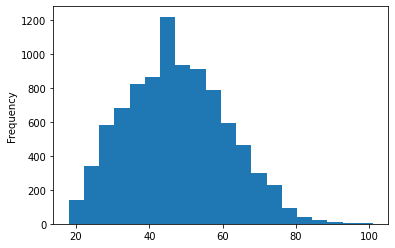

In [33]:
data["edad"].plot.hist(bins=20)

In [45]:
data[["CodigoPrograma", "edad"]].groupby("edad")\
    .count().reset_index().sort_values("CodigoPrograma")

,edad,CodigoPrograma
79,101.0,1
77,96.0,1
76,94.0,1
75,93.0,1
74,92.0,1
...,...,...
25,43.0,242
34,52.0,244
33,51.0,251
32,50.0,265


Los tomadores se mantiene entre los 40 y 60 años, la edad tiene un comportamiento normal, donde la moda es 44 años. Se cuenta con personas de hasta los 100 años en mucha menor medida.

<AxesSubplot:ylabel='Frequency'>

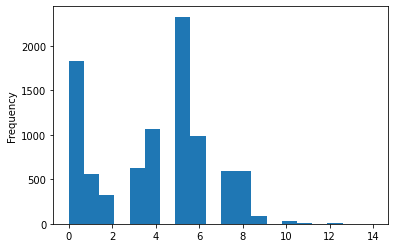

In [46]:
data["#_inscritos_activos"].plot.hist(bins=20)


In [47]:
data[["CodigoPrograma", "#_inscritos_activos"]].groupby("#_inscritos_activos")\
    .count().reset_index().sort_values("CodigoPrograma")


,#_inscritos_activos,CodigoPrograma
13,13.0,1
14,14.0,2
11,11.0,10
12,12.0,10
10,10.0,28
9,9.0,84
2,2.0,321
1,1.0,554
7,7.0,590
8,8.0,590


Hay muchos programas con 0 inscritos, sin embargo en general se cuenta con una moda en 5 inscritos por programa

<AxesSubplot:ylabel='Frequency'>

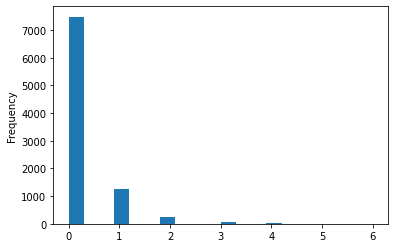

In [48]:
data["#_mascotas_activas"].plot.hist(bins=20)


In [49]:
data[["CodigoPrograma", "#_mascotas_activas"]].groupby("#_mascotas_activas")\
    .count().reset_index().sort_values("CodigoPrograma")


,#_mascotas_activas,CodigoPrograma
6,6.0,2
5,5.0,9
4,4.0,15
3,3.0,59
2,2.0,230
1,1.0,1246
0,0.0,7479


Casi todos los programas tienen 0 o 1 mascota, 2 o más terminan siendo valores poco frente, que en hipotesis inicial podría tener una ventaja con otras personas

In [63]:
data[["CodigoPrograma", "valorUltimaCuota"]].groupby("valorUltimaCuota")\
    .count().reset_index().sort_values("CodigoPrograma").tail(20)


,valorUltimaCuota,CodigoPrograma
51,10400.0,80
83,15100.0,80
21,8050.0,94
193,23300.0,99
8,6500.0,103
123,18600.0,106
138,19600.0,106
208,24100.0,123
82,15000.0,139
15,7500.0,172


Los valores más frecuentes de cuota rondan los 20.000

In [64]:
data[["CodigoPrograma", "qinactivos"]].groupby("qinactivos")\
    .count().reset_index().sort_values("CodigoPrograma")


,qinactivos,CodigoPrograma
5,6,3
4,5,9
3,4,210
2,3,1646
1,2,3243
0,1,3929


Existen casos donde los usuarios estuvieron inactivos en 2 o 3 ocasiones

In [65]:
data[["CodigoPrograma", "qactivos"]].groupby("qactivos")\
    .count().reset_index().sort_values("CodigoPrograma")


,qactivos,CodigoPrograma
4,5,4
3,4,108
1,2,2143
0,1,2418
2,3,4367


De igual manera se evidencia que se activaron hasta 3 veces la mayoria de personas, superando incluso la activación en 1 ocasión

In [66]:
data[["CodigoPrograma", "inactivof_activoi"]].groupby("inactivof_activoi")\
    .count().reset_index().sort_values("CodigoPrograma")



,inactivof_activoi,CodigoPrograma
1264,3031 days,1
1589,3944 days,1
1588,3940 days,1
1586,3933 days,1
1584,3925 days,1
...,...,...
890,214 days,65
1246,3 days,106
804,2 days,224
26,1 days,556


Existe varios casos de 0 a 3 donde los usuarios pasaron de estar activos a inactivos. Hasta 4000 dias han estados usuarios usando el plan

In [68]:
data[["CodigoPrograma", "inactivof_activof"]].groupby("inactivof_activof")\
    .count().reset_index().sort_values("CodigoPrograma")


,inactivof_activof,CodigoPrograma
1193,3259 days,1
1113,2935 days,1
1896,6700 days,1
1111,2925 days,1
1110,2922 days,1
...,...,...
156,-4 days,71
114,-3 days,78
0,-1 days,171
2255,90 days,547


Ultimo activo con ultimo inactivo puede no servirnos esta teniendo dias negativos en una gran catidad de repeticiones

In [69]:
data[["CodigoPrograma", "recauExitoso"]].groupby("recauExitoso")\
    .count().reset_index().sort_values("CodigoPrograma")



,recauExitoso,CodigoPrograma
69,84,1
67,70,1
58,59,1
59,60,2
63,64,2
...,...,...
7,8,510
2,3,513
3,4,526
6,7,543


En varios usuarios se evidencia recaudos exitosos entre 3 a 8 veces. Sin embargo, se ha llegado a tener gestion de cartera exitosa en un mismo programa hasta por 90 veces

In [70]:
data[["CodigoPrograma", "recauFallido"]].groupby("recauFallido")\
    .count().reset_index().sort_values("CodigoPrograma")




,recauFallido,CodigoPrograma
88,127,1
69,70,1
75,76,1
76,79,1
77,80,1
...,...,...
4,5,512
3,4,561
2,3,715
1,2,882


Los recaudos fallidos son menores en cantidad en la mayoría de programas, sin embargo, si existen un valor cercano al 10% de los programas donde se ha intentado hacer recaudo y ha sido fallido

In [71]:

data[["CodigoPrograma", "Nivel Socio Economico"]].groupby("Nivel Socio Economico")\
    .count().reset_index().sort_values("CodigoPrograma")




,Nivel Socio Economico,CodigoPrograma
5,5.0,40
6,6.0,70
4,4.0,347
1,1.0,381
0,0.0,577
2,2.0,978
3,3.0,1301


<AxesSubplot:ylabel='Frequency'>

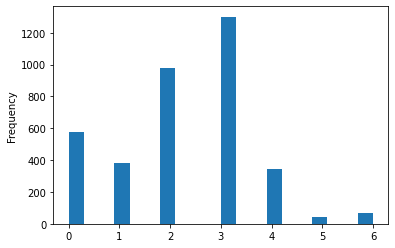

In [72]:
data["Nivel Socio Economico"].plot.hist(bins=20)


El nivel socio economico medio y bajo contiene a la mayoría de los programas, mientras que en los altos se evidencia menor afiliación a los planes exequiales

In [75]:
data[["CodigoPrograma", "Localidad"]].groupby("Localidad")\
    .count().reset_index().sort_values("CodigoPrograma")


,Localidad,CodigoPrograma
5,CIUDAD BOLIVAR,1
24,COMUNA 7 - TESORITO,1
1,ANTONIO NARIÃ‘O,2
40,TUNJUELITO,2
3,BOSA,4
23,COMUNA 7,4
4,CHAPINERO,5
34,PUENTE ARANDA,6
2,BARRIOS UNIDOS,7
36,SAN CRISTOBAL,7


Existen localidades de otras cidadades, la ciudadela del norte contiene la mayoría de la muestra. De igual manera la mayoría de población esta en Manizales

In [76]:
data[["CodigoPrograma", "estado"]].groupby("estado")\
    .count().reset_index().sort_values("CodigoPrograma")


,estado,CodigoPrograma
0,Activo,2804
1,Inactivo,6236


Nuestra base de datos contiene gran cantidad de inactivos, siendo casi el 30% solo usuarios activos, los inactivos nos permiten entrenar el modelo sin embargo los datos estaran desbalaceados, los balancearemos en un futuro

In [79]:
data[["CodigoPrograma", "motivo"]].groupby("motivo")\
    .count().reset_index().sort_values("CodigoPrograma").tail(10)


,motivo,CodigoPrograma
15,Experimentación,231
34,Problemas económicos,238
1,Activo para verificación,404
22,Influencia de seres cercanos,472
18,Inactivo para reactivación,492
27,No Interesado,529
19,Inactivo rescindido,962
13,Dificultad para ubicarlo,963
21,Incumplimiento en compromiso de pago,1216
0,Activo,2354


Los motivos más frecuentes estan relacionados con inclumplimiento en el pago, seguido por no interesado e inlfuencia de seres cercanos